In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Data Preprocessing
from pandas import read_csv
from datetime import datetime

def str2time(time_str):
    return datetime.strptime(time_str, '%Y %m %d %H')

def str3time(time_str):
    return datetime.strptime(time_str, '%Y %m')

In [3]:
## combine year, month, day, hour into datetime
Shenyang = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ShenyangPM20100101_20151231.csv", parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=str2time)

In [4]:
dataset = pd.read_csv("D:/Math546 Time series/final projects/PM2.5 Data of Five Chinese Cities Data Set/ChengduPM20100101_20151231.csv",  parse_dates=[['year', 'month']], index_col=0, date_parser=str3time)
#dataset
dataset.dropna(axis=0,subset = ["PM_US Post"], how="any",inplace=True)
dataset.groupby(['year_month']).size()

year_month
2012-05-01      1
2012-06-01    264
2012-07-01    729
2012-08-01    608
2012-09-01    693
2012-10-01    731
2012-11-01    672
2012-12-01    711
2013-01-01    718
2013-02-01    666
2013-03-01    409
2013-04-01    257
2013-05-01    744
2013-06-01    718
2013-07-01    624
2013-08-01    743
2013-09-01    706
2013-10-01    488
2013-11-01    577
2013-12-01    717
2014-01-01    742
2014-02-01    671
2014-03-01    742
2014-04-01    719
2014-05-01    740
2014-06-01    720
2014-07-01    563
2014-08-01    741
2014-09-01    706
2014-10-01    689
2014-11-01    706
2014-12-01    736
2015-01-01    741
2015-02-01    670
2015-03-01    741
2015-04-01    717
2015-05-01    738
2015-06-01    717
2015-07-01    694
2015-08-01    731
2015-09-01    712
2015-10-01    742
2015-11-01    718
2015-12-01    728
dtype: int64

In [5]:
Shenyang

,No,season,PM_Taiyuanjie,PM_US Post,PM_Xiaoheyan,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
year_month_day_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,4,NaN,NaN,NaN,-26.0,69.79,1024.0,-22.0,NE,1.0289,NaN,NaN
2010-01-01 01:00:00,2,4,NaN,NaN,NaN,-26.0,76.26,1024.0,-23.0,NE,2.5722,NaN,NaN
2010-01-01 02:00:00,3,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,5.1444,NaN,NaN
2010-01-01 03:00:00,4,4,NaN,NaN,NaN,-27.0,69.56,1023.0,-23.0,NE,7.7166,NaN,NaN
2010-01-01 04:00:00,5,4,NaN,NaN,NaN,-27.0,69.56,1022.0,-23.0,NE,9.7744,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,52580,4,162.0,166.0,435.0,-10.0,92.42,1031.0,-9.0,SE,2.0000,0.0,0.0
2015-12-31 20:00:00,52581,4,255.0,259.0,429.0,-10.0,79.10,1030.0,-7.0,SE,5.0000,0.0,0.0
2015-12-31 21:00:00,52582,4,266.0,368.0,361.0,-10.0,79.10,1030.0,-7.0,SE,8.0000,0.0,0.0


In [6]:
#Delet non-useful data
Shenyang.drop(['No','season','PM_Taiyuanjie','PM_Xiaoheyan','DEWP','HUMI','PRES','TEMP','cbwd','Iws','precipitation','Iprec'], 
               axis=1,
              inplace=True)

Shenyang

,PM_US Post
year_month_day_hour,
2010-01-01 00:00:00,NaN
2010-01-01 01:00:00,NaN
2010-01-01 02:00:00,NaN
2010-01-01 03:00:00,NaN
2010-01-01 04:00:00,NaN
...,...
2015-12-31 19:00:00,166.0
2015-12-31 20:00:00,259.0
2015-12-31 21:00:00,368.0


In [7]:
## rename columns
Shenyang.index.name = 'date'

In [8]:
Shenyang.dropna(axis=0, how="any",inplace=True)

In [9]:
Shenyang.index = pd.to_datetime(Shenyang.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shenyang = Shenyang.set_index(Shenyang.index).asfreq('H')

#print(by_hour.index)

In [23]:
df = Shenyang[(Shenyang.index >=pd.to_datetime('20140903000000')) & (Shenyang.index <= pd.to_datetime('20140917230000'))]

len(df)

360

In [24]:
df = df.set_index(df.index).asfreq('H')


df = df.fillna(method='ffill')
len(df)

360

In [ ]:
##sARIMA Forecast

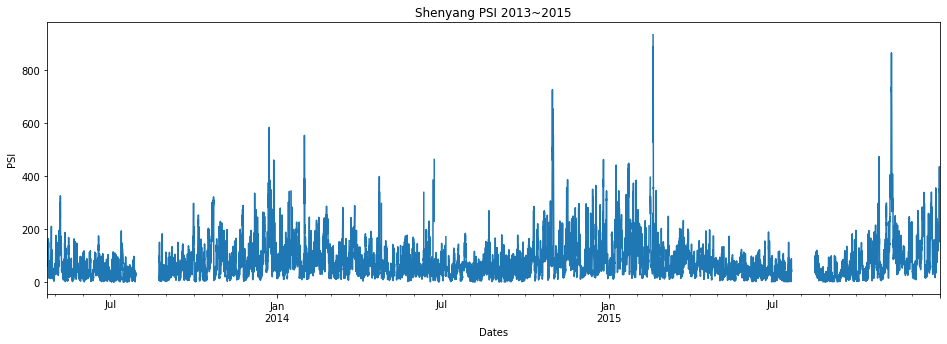

In [10]:
ax = Shenyang['PM_US Post'].plot(figsize = (16,5), title = "Shenyang PSI 2013~2015")
ax.set(xlabel='Dates', ylabel='PSI');

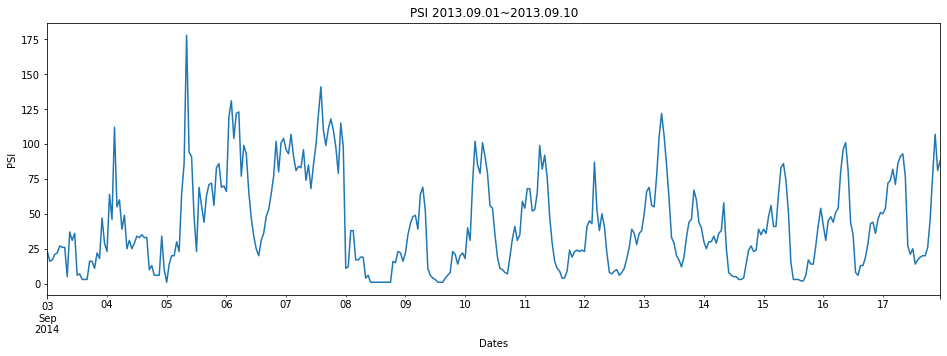

In [25]:
ax = df['PM_US Post'].plot(figsize = (16,5), title = "PSI 2013.09.01~2013.09.10")
ax.set(xlabel='Dates', ylabel='PSI');

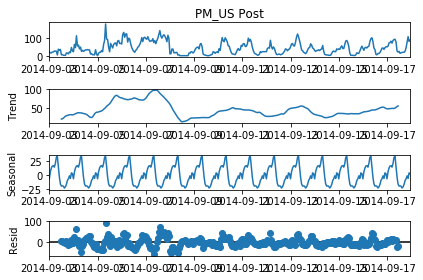

In [26]:
a = seasonal_decompose(df["PM_US Post"], model = "add")
a.plot();

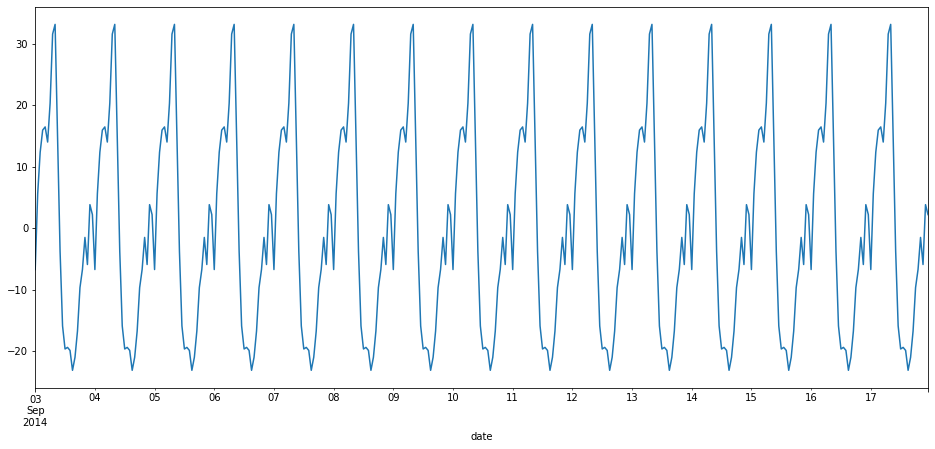

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

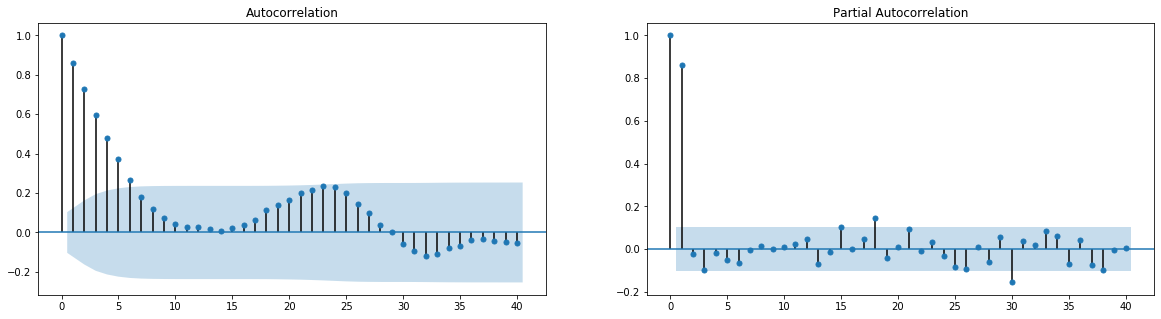

In [28]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
plot_acf(df['PM_US Post'], lags=40, ax=axes[0], fft=False)
plot_pacf(df['PM_US Post'], lags=40, ax=axes[1])
plt.show()

In [29]:
import statsmodels.api as sm

res = sm.tsa.stattools.arma_order_select_ic(df['PM_US Post'], ic=['aic']) 
print (res.aic_min_order)

(1, 0)


In [30]:
#auto_arima() function to get best p,d,q,P,D,Q values
auto_arima(df['PM_US Post'], start_p = 0, start_q = 0, 
                          max_p = 3, max_q = 3, m=24,
                          start_P = 0, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 0, 0)x(0, 1, 1, 24) (constant=True); AIC=3311.982, BIC=3323.433, Time=2.439 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=3451.750, BIC=3459.384, Time=0.062 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 24) (constant=True); AIC=2970.982, BIC=2986.250, Time=2.544 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 24) (constant=True); AIC=3096.037, BIC=3111.305, Time=2.273 seconds
Near non-invertible roots for order (0, 0, 1)(0, 1, 1, 24); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 24) (constant=False); AIC=3451.095, BIC=3454.912, Time=0.049 seconds
Fit ARIMA: (1, 0, 0)x(0, 1, 0, 24) (constant=True); AIC=3057.314, BIC=3068.765, Time=0.360 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 0, 24) (constant=True); AIC=2938.416, BIC=2957.501, Time=7.436 seconds
Fit ARIMA: (1, 0, 0)x(2, 1, 1, 24) (constant=True); AIC=2884.291, BIC=2907.194, Time=27.466 seconds
Near

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  360
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1435.774
Date:                              Sat, 25 Apr 2020   AIC                           2883.548
Time:                                      11:49:23   BIC                           2906.450
Sample:                                           0   HQIC                          2892.677
                                              - 360                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0188      0.255      0.074      0.941      -0.481       0.519
ar.L1          0.7700      0.034     22.976      0.000       0.704       0.836
ar.L2          0.0988      0.043      2.277      0.023       0.014       0.184
ar.S.L24      -0.0372      0.066     -0.568      0.570      -0.166       0.091
ma.S.L24      -0.9189      0.116     -7.937      0.000      -1.146      -0.692
sigma2       263.2009     27.119      9.705      0.000     210.048     316.354
===================================================================================
Ljung-Box (Q):                       36.26   Jarque-Bera (JB):               479.35
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# the best arima model chosen by auto_arima() is SARIMAX(2, 0, 0)x(1, 1, [1], 24)



# split the data into train and test set
train_data = df[:len(df)-72]
test_data = df[len(df)-72:]
arima_model = SARIMAX(train_data['PM_US Post'], order =(2, 0, 0), seasonal_order = (1, 1, 1, 24))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                           PM_US Post   No. Observations:                  288
Model:             SARIMAX(2, 0, 0)x(1, 1, [1], 24)   Log Likelihood               -1145.358
Date:                              Sat, 25 Apr 2020   AIC                           2300.715
Time:                                      11:49:35   BIC                           2318.595
Sample:                                  09-03-2014   HQIC                          2307.900
                                       - 09-14-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7480      0.038     19.631      0.000       0.673       0.823
ar.L2          0.1293      0.049      2.648      0.008       0.034       0.225
ar.S.L24      -0.0537      0.076     -0.707      0.479      -0.202       0.095
ma.S.L24      -0.9997     44.882     -0.022      0.982     -88.967      86.967
sigma2       270.3823   1.21e+04      0.022      0.982   -2.35e+04     2.4e+04
===================================================================================
Ljung-Box (Q):                       34.03   Jarque-Bera (JB):               370.64
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.tail(10)

2014-09-17 14:00:00    25.791704
2014-09-17 15:00:00    21.643791
2014-09-17 16:00:00    24.292785
2014-09-17 17:00:00    28.519507
2014-09-17 18:00:00    35.147138
2014-09-17 19:00:00    37.867439
2014-09-17 20:00:00    44.071155
2014-09-17 21:00:00    38.621336
2014-09-17 22:00:00    47.756102
2014-09-17 23:00:00    44.350341
Freq: H, Name: ARIMA Predictions, dtype: float64

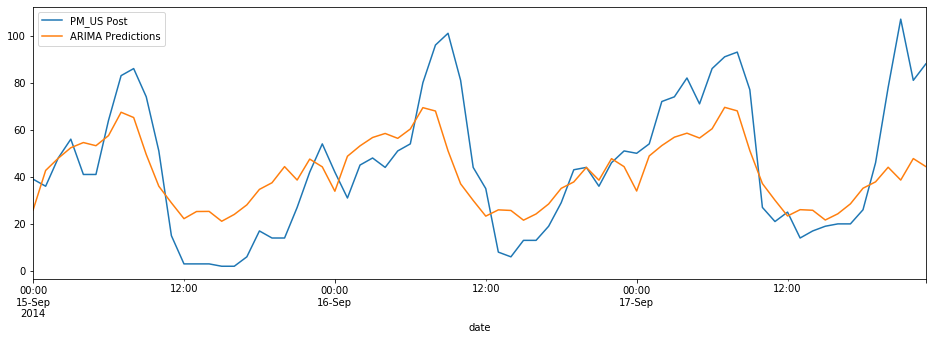

In [33]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [34]:
arima_rmse_error = rmse(test_data['PM_US Post'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 391.9196366291792
RMSE Error: 19.796960287609288
Mean: 43.41111111111111


In [35]:
test_data['ARIMA_Predictions'] = arima_pred

In [ ]:
################################################################################################################################

In [ ]:
##LSTM Forecast

In [ ]:
################################################################################################################################

In [ ]:
#df

In [36]:
# Scale train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [37]:
# Before creating LSTM model, create a Time Series Generator object.
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 24
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [38]:
lstm_model.fit_generator(generator,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
264/264 [==============================] - 2s 9ms/step - loss: 0.0270
Epoch 2/50
264/264 [==============================] - 2s 7ms/step - loss: 0.0193
Epoch 3/50
264/264 [==============================] - 2s 7ms/step - loss: 0.0150
Epoch 4/50
264/264 [==============================] - 2s 8ms/step - loss: 0.0132
Epoch 5/50
264/264 [==============================] - 2s 9ms/step - loss: 0.0128
Epoch 6/50
264/264 [==============================] - 3s 11ms/step - loss: 0.0123: 0s - loss: 0.012
Epoch 7/50
264/264 [==============================] - 3s 10ms/step - loss: 0.0117
Epoch 8/50
264/264 [==============================] - 3s 11ms/step - loss: 0.0114
Epoch 9/50
264/264 [==============================] - 3s 10ms/step - loss: 0.0112
Epoch 10/50
264/264 [==============================] - 3s 11ms/step - loss: 0.0119
Epoch 11/50
264/264 [==============================] - 3s 10ms/step - loss: 0.0111
Epoch 12/50
264/264 [==============

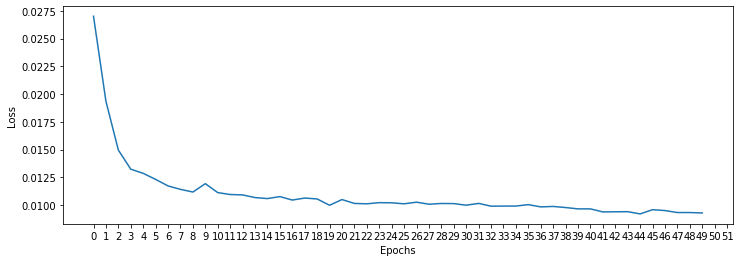

In [39]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,170,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [40]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [41]:
lstm_predictions_scaled

[array([0.24315855], dtype=float32),
 array([0.27587244], dtype=float32),
 array([0.30263335], dtype=float32),
 array([0.32135797], dtype=float32),
 array([0.32699004], dtype=float32),
 array([0.31813404], dtype=float32),
 array([0.28993806], dtype=float32),
 array([0.24969688], dtype=float32),
 array([0.21057045], dtype=float32),
 array([0.18788636], dtype=float32),
 array([0.1811518], dtype=float32),
 array([0.18932688], dtype=float32),
 array([0.20946597], dtype=float32),
 array([0.2392849], dtype=float32),
 array([0.2770096], dtype=float32),
 array([0.318799], dtype=float32),
 array([0.35756248], dtype=float32),
 array([0.38346627], dtype=float32),
 array([0.39120308], dtype=float32),
 array([0.3883613], dtype=float32),
 array([0.3802531], dtype=float32),
 array([0.3739208], dtype=float32),
 array([0.36959663], dtype=float32),
 array([0.37538698], dtype=float32),
 array([0.38702235], dtype=float32),
 array([0.39990044], dtype=float32),
 array([0.4124737], dtype=float32),
 array([0.

In [42]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[44.03906319],
       [49.82942173],
       [54.56610209],
       [57.88035989],
       [58.87723675],
       [57.30972502],
       [52.31903705],
       [45.19634786],
       [38.27097046],
       [34.25588524],
       [33.06386989],
       [34.51085818],
       [38.07547592],
       [43.3534278 ],
       [50.03070033],
       [57.42742106],
       [64.28855938],
       [68.87353042],
       [70.24294439],
       [69.73995098],
       [68.30479982],
       [67.1839813 ],
       [66.41860357],
       [67.44349602],
       [69.50295529],
       [71.78237724],
       [74.00784639],
       [74.74498698],
       [72.78150654],
       [68.36105254],
       [62.8092089 ],
       [57.19574258],
       [52.5001651 ],
       [51.25580055],
       [54.65563485],
       [61.17077464],
       [67.74516863],
       [74.23679769],
       [80.40103319],
       [85.67720476],
       [90.08026177],
       [93.58609742],
       [96.12612075],
       [97.57105178],
       [98.07699919],
       [98

In [43]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,PM_US Post,ARIMA_Predictions,LSTM_Predictions
date,,,
2014-09-15 00:00:00,39.0,25.883909,44.039063
2014-09-15 01:00:00,36.0,42.715388,49.829422
2014-09-15 02:00:00,48.0,47.888205,54.566102
2014-09-15 03:00:00,56.0,52.351958,57.880360
2014-09-15 04:00:00,41.0,54.564934,58.877237
...,...,...,...
2014-09-17 19:00:00,46.0,37.867439,90.296611
2014-09-17 20:00:00,78.0,44.071155,90.142465
2014-09-17 21:00:00,107.0,38.621336,90.025085


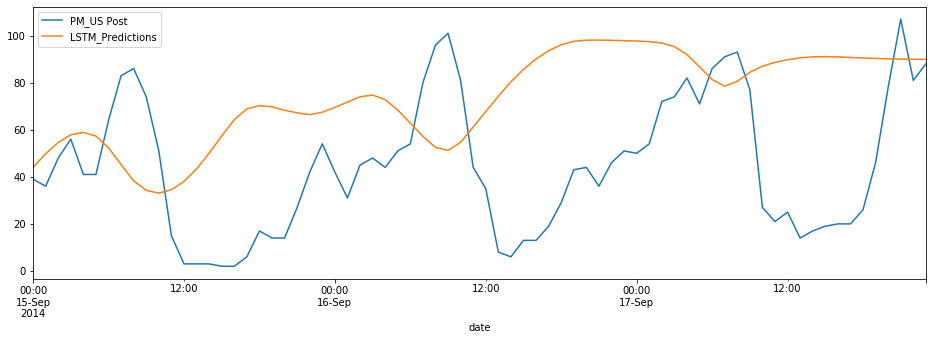

In [44]:
test_data['PM_US Post'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True);

In [45]:
lstm_rmse_error = rmse(test_data['PM_US Post'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 1997.0616946900905
RMSE Error: 44.68849622319026
Mean: 43.41111111111111


In [46]:
################################################################################################################################

In [47]:
##Prophet Forecast

In [48]:
################################################################################################################################

In [49]:
df_pr = df.copy()
df_pr = df.reset_index()
df_pr.columns = ['ds','y'] # To use prophet column names should be like that
train_data_pr = df_pr.iloc[:len(df)-72]
test_data_pr = df_pr.iloc[len(df)-72:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=72,freq='H')
prophet_pred = m.predict(future)
prophet_pred.tail()

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
355,2014-09-17 19:00:00,23.973740,-15.639625,59.413036,22.427579,25.335835,-2.610999,-2.610999,-2.610999,-2.610999,-2.610999,-2.610999,0.0,0.0,0.0,21.362741
356,2014-09-17 20:00:00,23.866627,-10.621336,63.456269,22.281165,25.249212,2.102775,2.102775,2.102775,2.102775,2.102775,2.102775,0.0,0.0,0.0,25.969402
357,2014-09-17 21:00:00,23.759514,-11.638702,65.938695,22.126005,25.179374,2.235247,2.235247,2.235247,2.235247,2.235247,2.235247,0.0,0.0,0.0,25.994761
358,2014-09-17 22:00:00,23.652401,-15.297029,62.237356,21.972508,25.104029,-0.476619,-0.476619,-0.476619,-0.476619,-0.476619,-0.476619,0.0,0.0,0.0,23.175781
359,2014-09-17 23:00:00,23.545288,-17.190988,60.310818,21.820890,25.020995,-2.051473,-2.051473,-2.051473,-2.051473,-2.051473,-2.051473,0.0,0.0,0.0,21.493815


In [50]:
#df_pr

In [51]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-72:]['ds'], "Pred" : prophet_pred[-72:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "H"
prophet_pred

,Pred
Date,
2014-09-15 00:00:00,31.223885
2014-09-15 01:00:00,35.990850
2014-09-15 02:00:00,40.466669
2014-09-15 03:00:00,42.835413
2014-09-15 04:00:00,44.200636
...,...
2014-09-17 19:00:00,21.362741
2014-09-17 20:00:00,25.969402
2014-09-17 21:00:00,25.994761


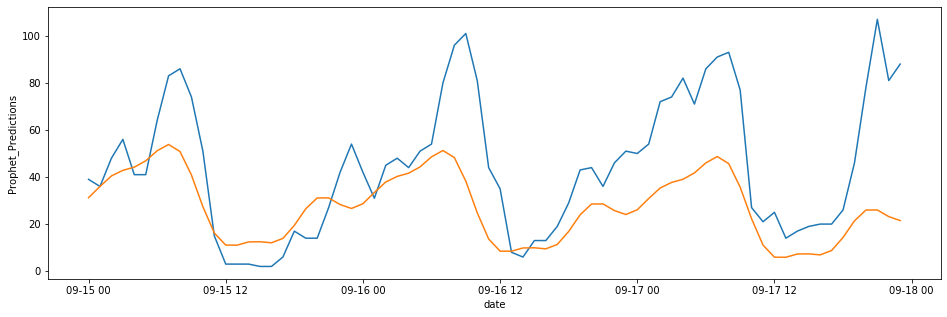

In [52]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values
import seaborn as sns
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["PM_US Post"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [53]:
prophet_rmse_error = rmse(test_data['PM_US Post'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['PM_US Post'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 736.6242565131203
RMSE Error: 27.14082269411007
Mean: 43.41111111111111


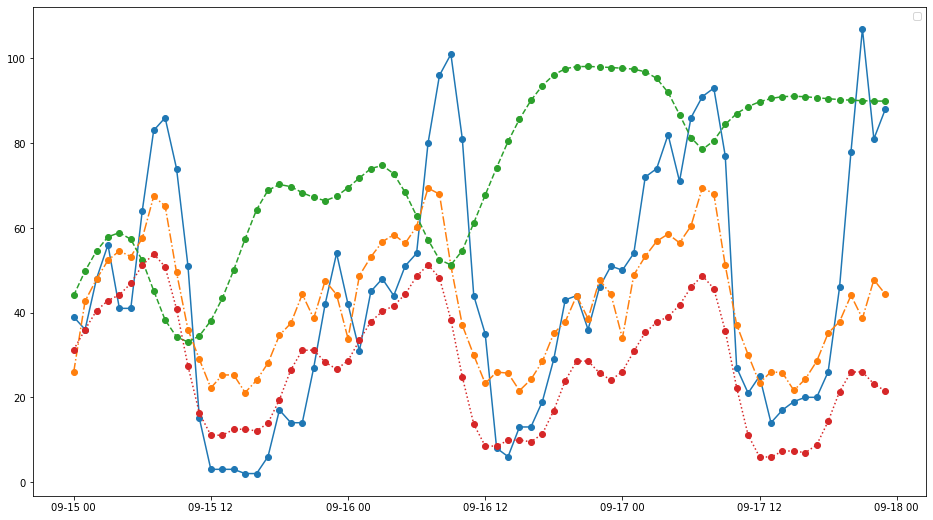

In [54]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["PM_US Post"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [55]:
print(f"Mean: {test_data['PM_US Post'].mean()}")
errors

Mean: 44.72222222222222


,Models,RMSE Errors,MSE Errors
0,ARIMA,19.796960,391.919637
1,LSTM,44.688496,1997.061695
2,Prophet,27.140823,736.624257


In [56]:
test_data.head(50)

,PM_US Post,ARIMA_Predictions,LSTM_Predictions,Prophet_Predictions
date,,,,
2014-09-15 00:00:00,39.0,25.883909,44.039063,31.223885
2014-09-15 01:00:00,36.0,42.715388,49.829422,35.990850
2014-09-15 02:00:00,48.0,47.888205,54.566102,40.466669
2014-09-15 03:00:00,56.0,52.351958,57.880360,42.835413
2014-09-15 04:00:00,41.0,54.564934,58.877237,44.200636
2014-09-15 05:00:00,41.0,53.222638,57.309725,46.885989
2014-09-15 06:00:00,64.0,57.517554,52.319037,51.143340
2014-09-15 07:00:00,83.0,67.439864,45.196348,53.842045
2014-09-15 08:00:00,86.0,65.196918,38.270970,50.818823
